# Classify Handwritten-Digits with Keras
[Jian Tao](https://coehpc.engr.tamu.edu/people/jian-tao/), Texas A&M University

Oct 21, 2019

Modified from the TensorFlow 1.x example.

In [1]:
%load_ext tensorboard
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import numpy as np
import os, datetime

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

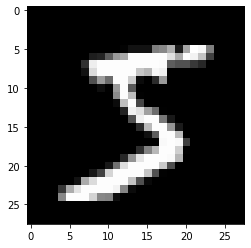

In [3]:
# show the first image in the data set
plt.imshow(X_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

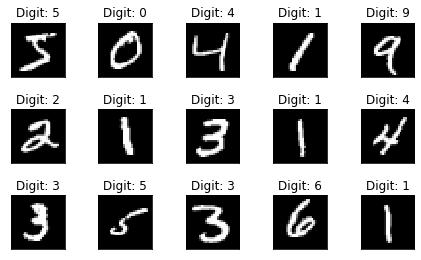

In [4]:
# show the first 15 images in the data set.
fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [5]:
# Normalize the train dataset
X_train = utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = utils.normalize(X_test, axis=1)

In [6]:
#Build the model object
model = Sequential()
# Add the Flatten Layer
model.add(Flatten())
# Build the input and the hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
# Build the output layer
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [9]:
model.fit(x=X_train, y=y_train, epochs=10, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback]) # Start training process

Epoch 1/10
   1/1875 [..............................] - ETA: 0s - loss: 2.3303 - accuracy: 0.0625

W1202 07:17:40.394105 140008127813248 deprecation.py:323] From /usr/local/lib64/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
W1202 07:17:40.400038 140008127813248 callbacks.py:328] Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_train_batch_end` time: 0.0068s). Check your callbacks.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2606 - accuracy: 0.9243 - val_loss: 0.1226 - val_accuracy: 0.9627
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9685 - val_loss: 0.1053 - val_accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0710 - accuracy: 0.9776 - val_loss: 0.0960 - val_accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9834 - val_loss: 0.0938 - val_accuracy: 0.9721
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0857 - val_accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0946 - val_accuracy: 0.9734
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0250 - accuracy: 0.9913 - val_loss: 0.0874 - val_accuracy: 0.9762
Epo

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=X_test, y=y_test, verbose=0)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9714999794960022


In [12]:
# Save model into MNIST.h5 and we are all done with the training now.
model.save('MNIST.h5')

In [13]:
model = models.load_model('MNIST.h5')

In [14]:
predictions = model.predict(X_test)

In [15]:
# function that plots a single image.
def test_digit(i):
    plt.imshow(X_test[i], interpolation='none')
    plt.title("digit:%d   prediction: %d" %(y_test[i], np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])

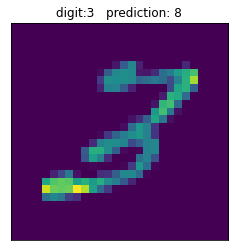

In [16]:
# let's output the images which were not predicted correctly.
for i in range(len(X_test)):
    if np.argmax(predictions[i]) != y_test[i]:
        test_digit(i)